<img src="../src/packt-banner.png" alt="">

### Exercise 1: Preparing data to Train a Predictive Model for the Employee-Retention Problem
##### (20 points) --> your total will divided by 4 to get 5 points for this exercise.
---

Suppose you are hired to do freelance work for a company who wants to find insights into why their employees are leaving. They have compiled a set of data they think will be helpful in this respect. It includes details on employee satisfaction levels, evaluations, time spent at work, department, and salary.

The company shares their data with you by sending you a file called hr_data.csv and asking what you think can be done to help stop employees from leaving.

Our aim in his exercis is apply the concepts you've learned thus far to a real-life problem.
In particular, we seek to:
* Prepare the data for use in machine learning models.


** You will find the dataset under the datasets section on Canvas **

### Step to do:

(1) import the requierd pakages: (1 point)

* pandas as pd
* numpy as np
* matplotlib.pyplot as plt
* seaborn as sns



In [2]:
# write your code here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## uncomment the following lines:
%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

(2) Load the data with Pandas using read_csv(): (1 point)


In [3]:
## Read the data from csv file:
df = pd.read_csv('hr_data.csv')

(3) Inspect the columns by printing df.columns and make sure the data has loaded as expected by printing the DataFrame head and tail with df.head() and df.tail() (3 points)

In [4]:
# write your code here:
df.head()
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


(4) Check the number of rows (including the header) in the CSV file:

In [5]:
# How many lines in the CSV (including header)

with open('hr_data.csv') as f:
    print("Number of lines in the CSV (including header):", len(f.read().splitlines()))


Number of lines in the CSV (including header): 15000


Compare the above result to len(df) to make sure we've loaded all the data (1 point)

In [6]:
# How many samples did we load into Python?
# Check the number of rows in the DataFrame
print("Number of rows loaded into the DataFrame (excluding header):", len(df))
# Step 1: Count the number of lines in the CSV (including header)
with open('hr_data.csv') as f:
    print("Number of lines in the CSV (including header):", len(f.read().splitlines()))

# Step 2: Compare with the number of rows in the DataFrame
print("Number of rows loaded into the DataFrame (excluding header):", len(df))

Number of rows loaded into the DataFrame (excluding header): 14999
Number of lines in the CSV (including header): 15000
Number of rows loaded into the DataFrame (excluding header): 14999


---
(5) Assess the target:

1- From the dataset and the problem that you are trying to solve, what column should be your target to determine whether an employee has stayed in the company or not? (1 point)

In [7]:
# display you target column:
# Display the target column
print(df['left'].head())

0    yes
1    yes
2    yes
3    yes
4    yes
Name: left, dtype: object


2- use df.NAME OF THE TARGET COLUMN.value_counts().plot('barh') to check the distribution of the target (1 point) and number of missing entries (1 point)

Note: replace the value with the Capitals letter with your target name

left
no     11428
yes     3571
Name: count, dtype: int64


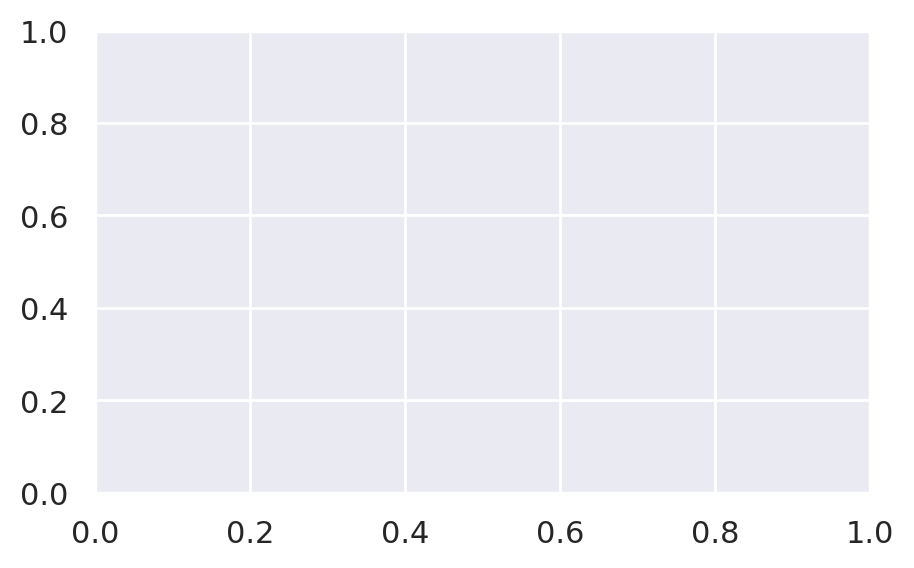

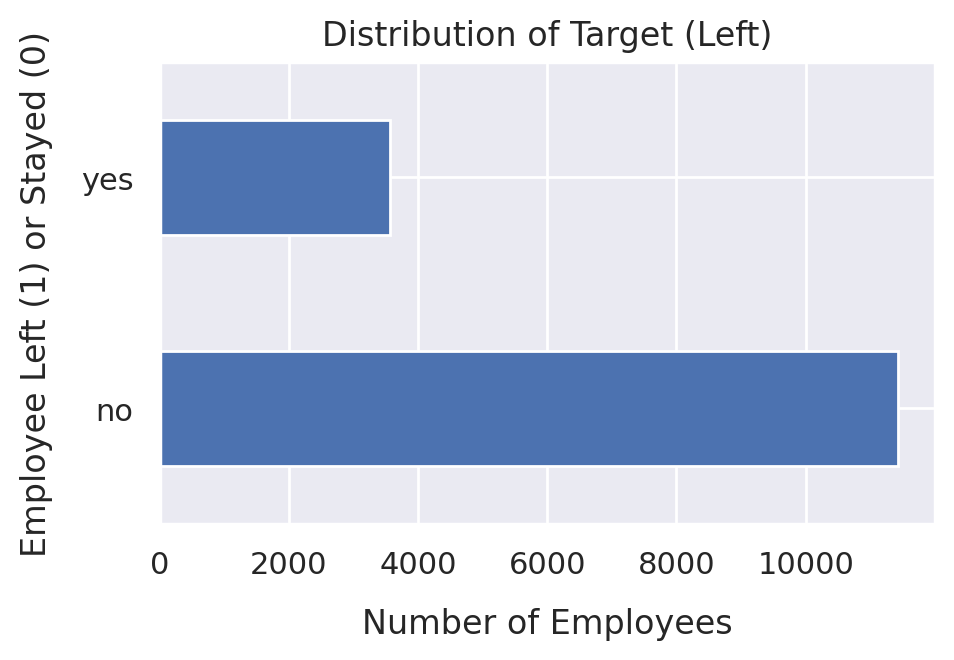

Number of missing entries in the target column: 0


In [8]:
# How is it distributed?
fig, ax = plt.subplots(figsize=(5, 3))

# write your code here:
import matplotlib.pyplot as plt

# Step 1: Check the distribution of the target column
print(df['left'].value_counts())

# Step 2: Plot the distribution as a horizontal bar chart
fig, ax = plt.subplots(figsize=(5, 3))
df['left'].value_counts().plot(kind='barh', ax=ax)
ax.set_title('Distribution of Target (Left)')
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Employee Left (1) or Stayed (0)')
plt.show()

# Step 3: Check for missing entries in the target column
missing_entries = df['left'].isna().sum()
print("Number of missing entries in the target column:", missing_entries)


In [9]:
# Check for missing values in each column of the DataFrame
missing_data = df.isna().sum()

# Display missing data for each column
print("Missing data in each column:\n", missing_data)

# Check the total number of missing values in the entire dataset
total_missing = df.isna().sum().sum()
print("\nTotal number of missing values in the dataset:", total_missing)

Missing data in each column:
 satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         151
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                14764
department                   0
salary                       0
dtype: int64

Total number of missing values in the dataset: 15283


3- use df.NAME OF THE TARGET COLUMN.isnull().sum() to check the number of missing entries (1 point)

---
(6) Assess the features

1- Print the data type of each feature using dtypes ( 1 point)

In [10]:
# Print datatypes
print(df.dtypes)


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object


2- Display the feature distributions.

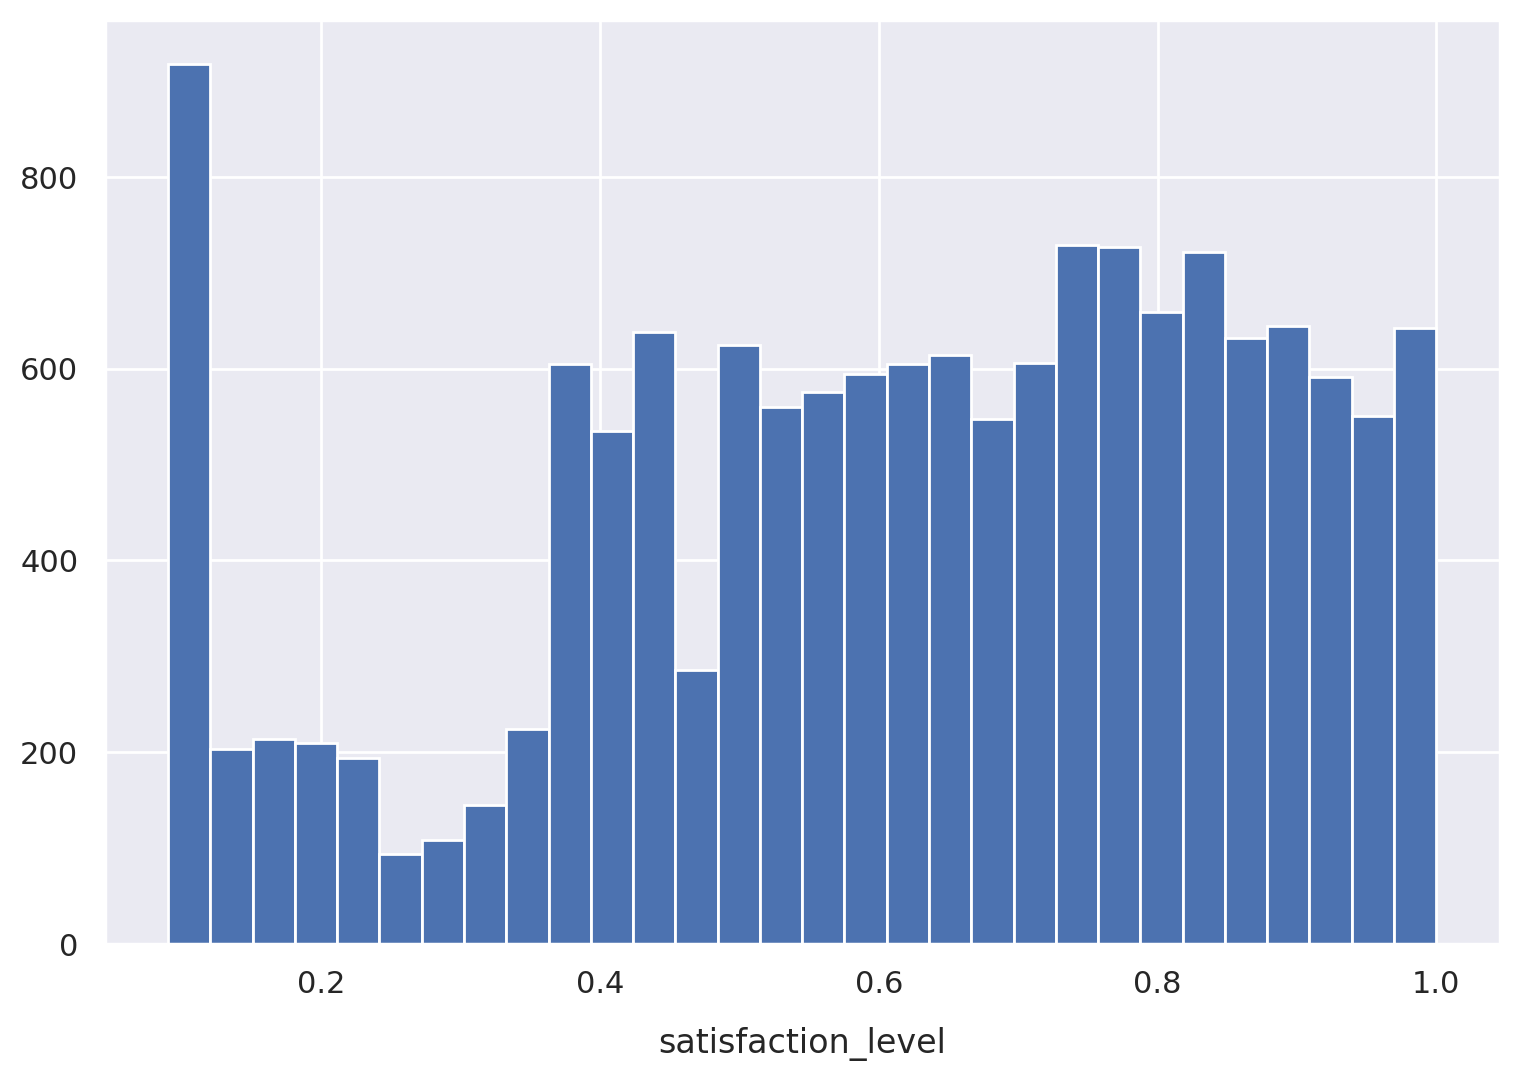

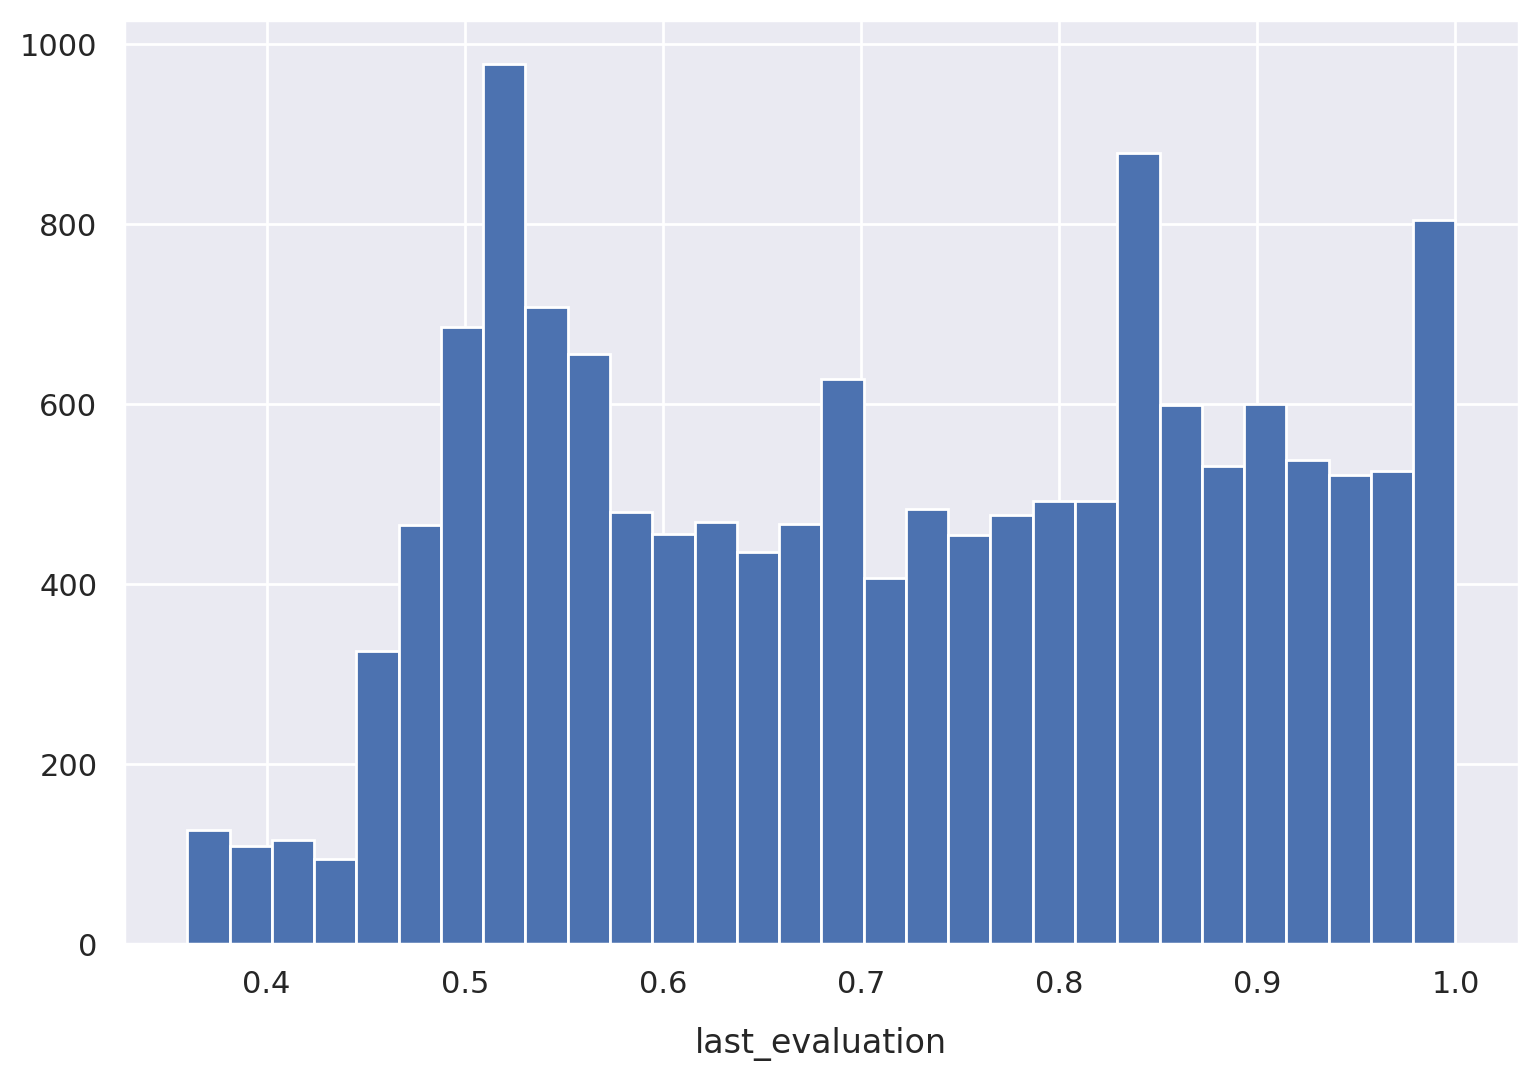

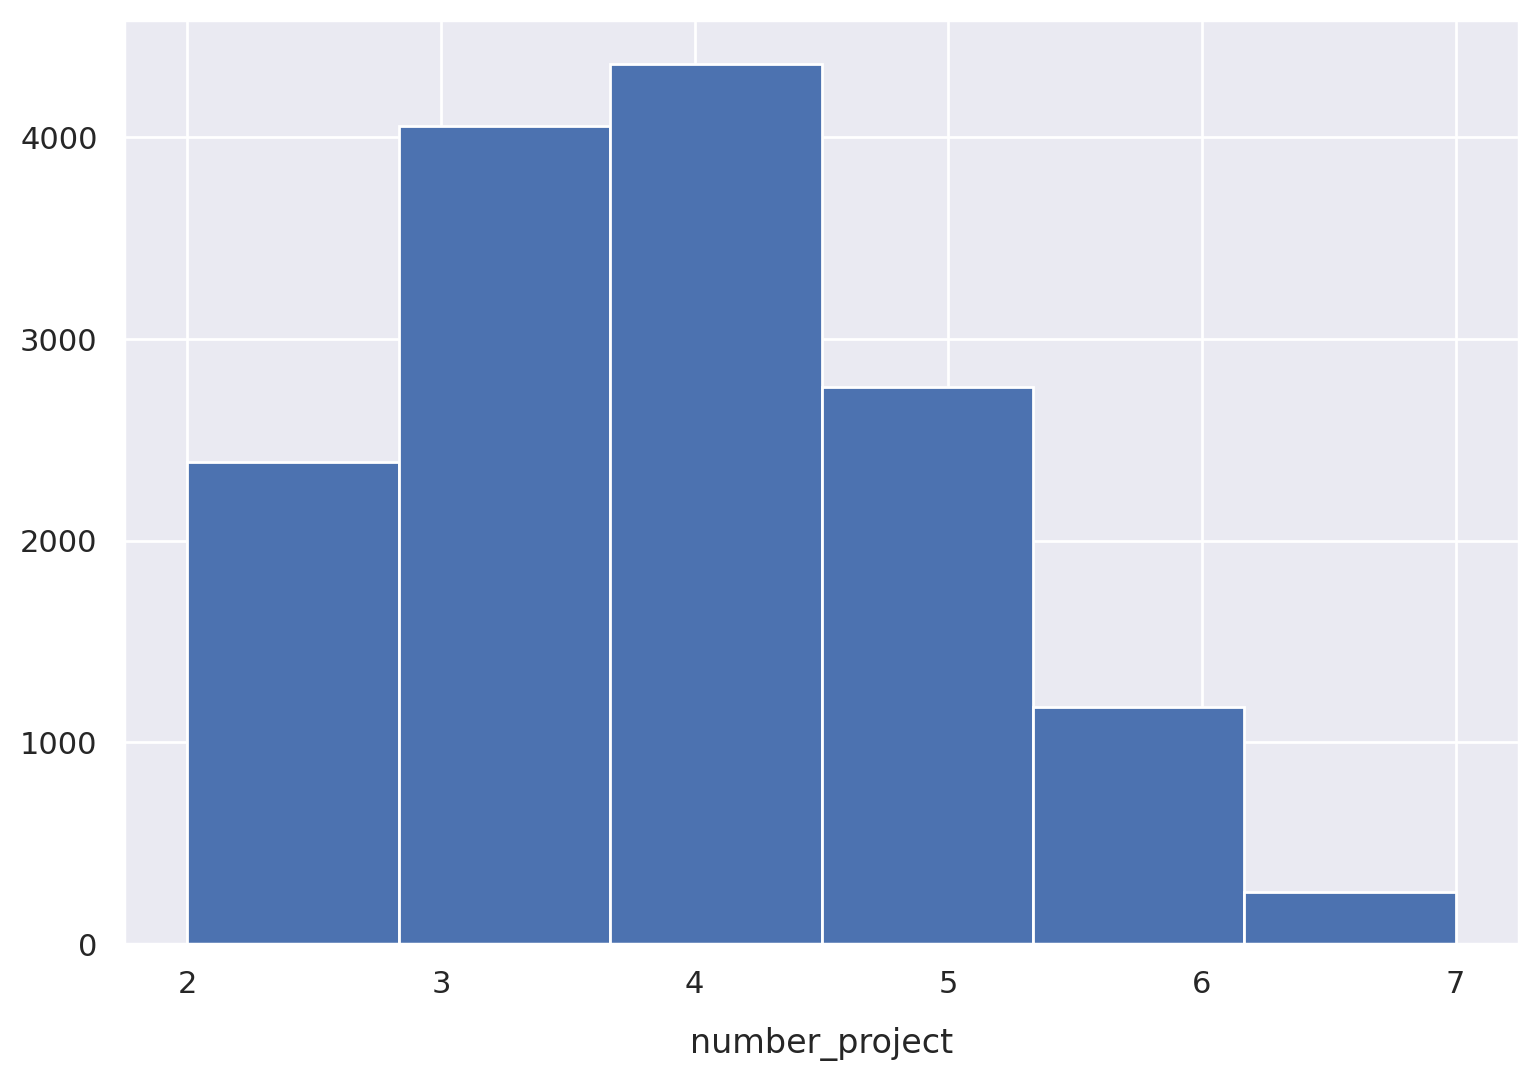

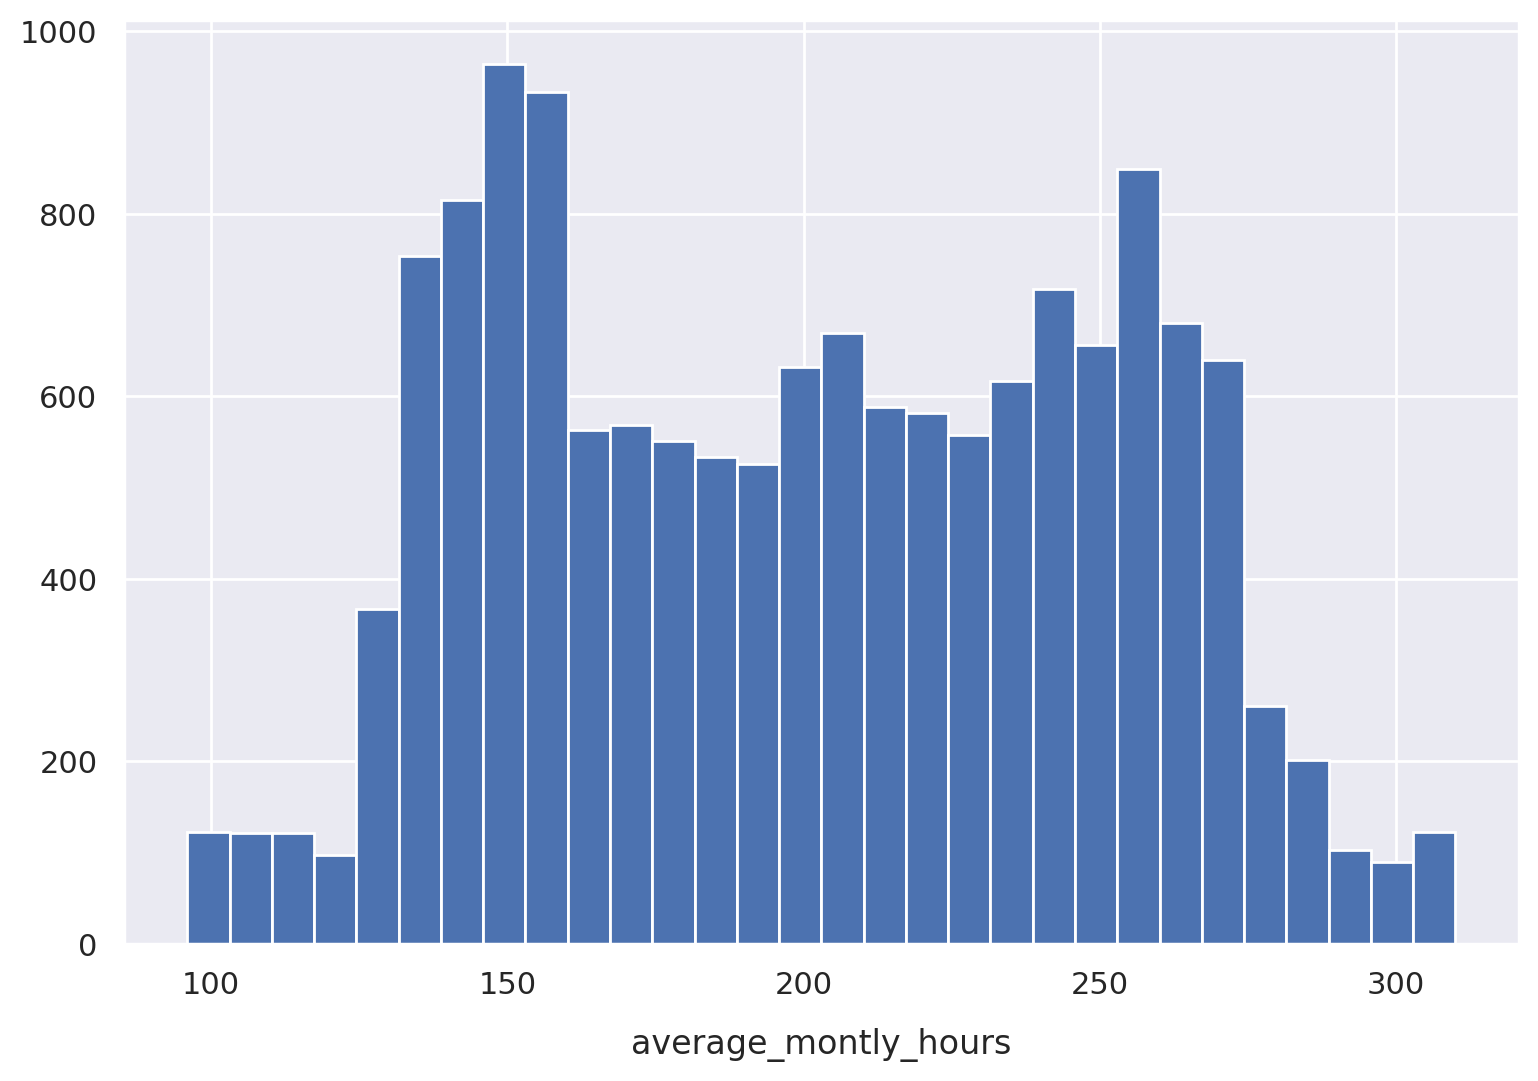

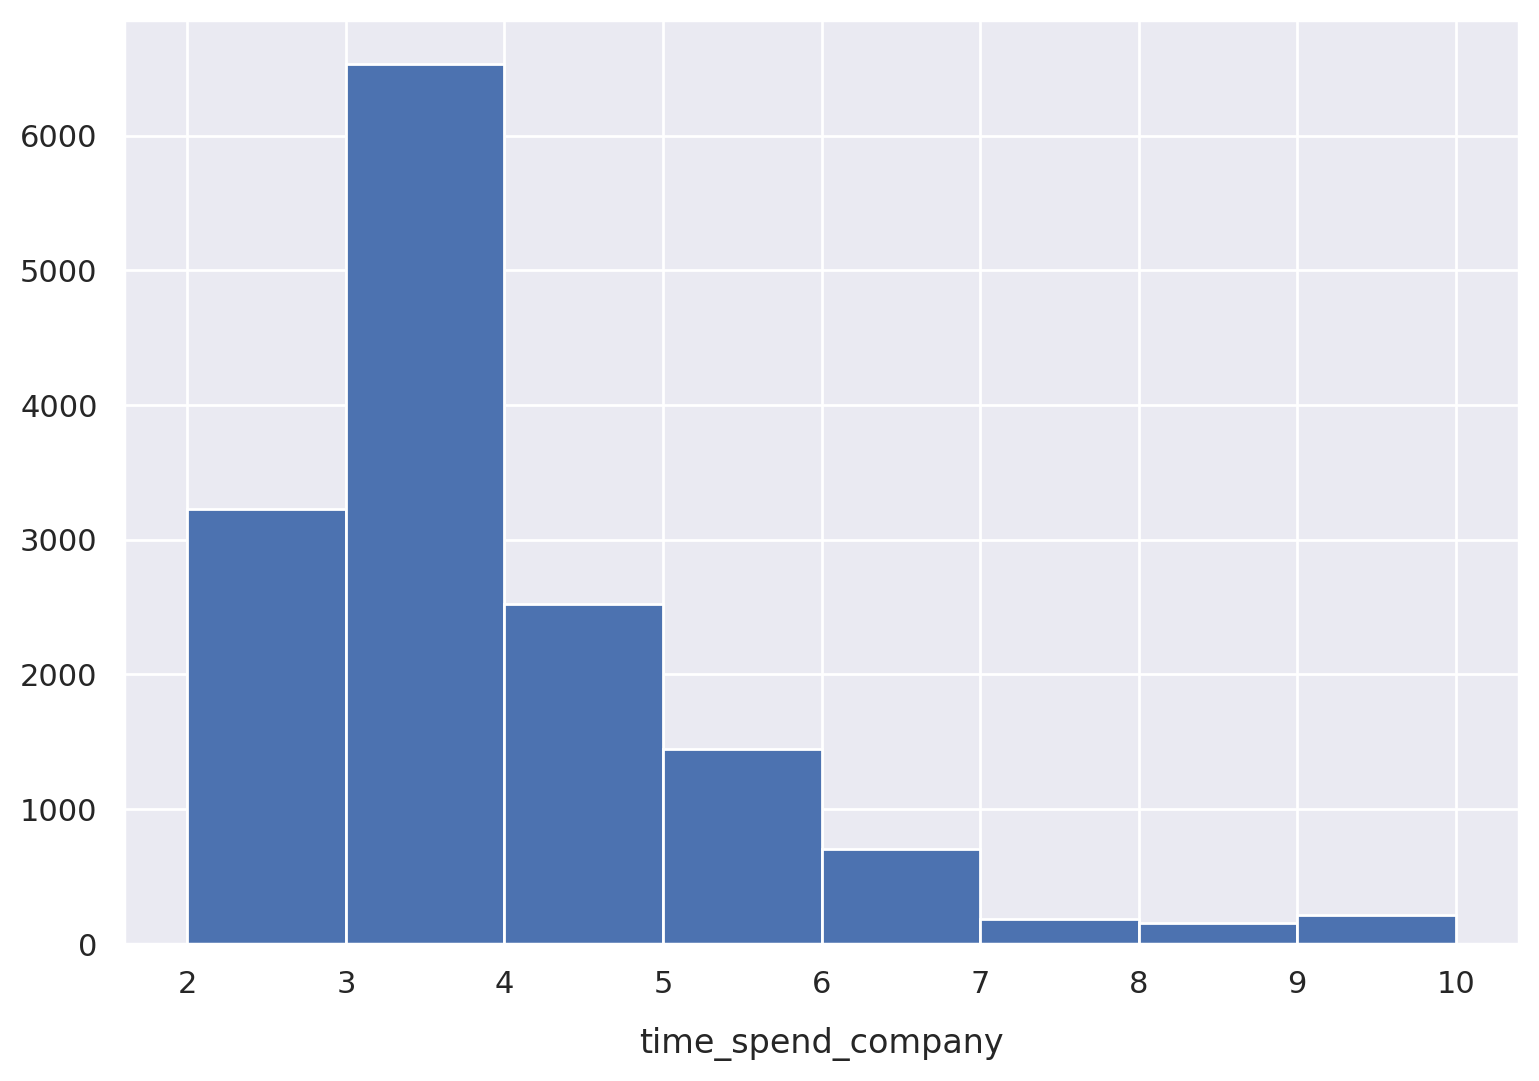

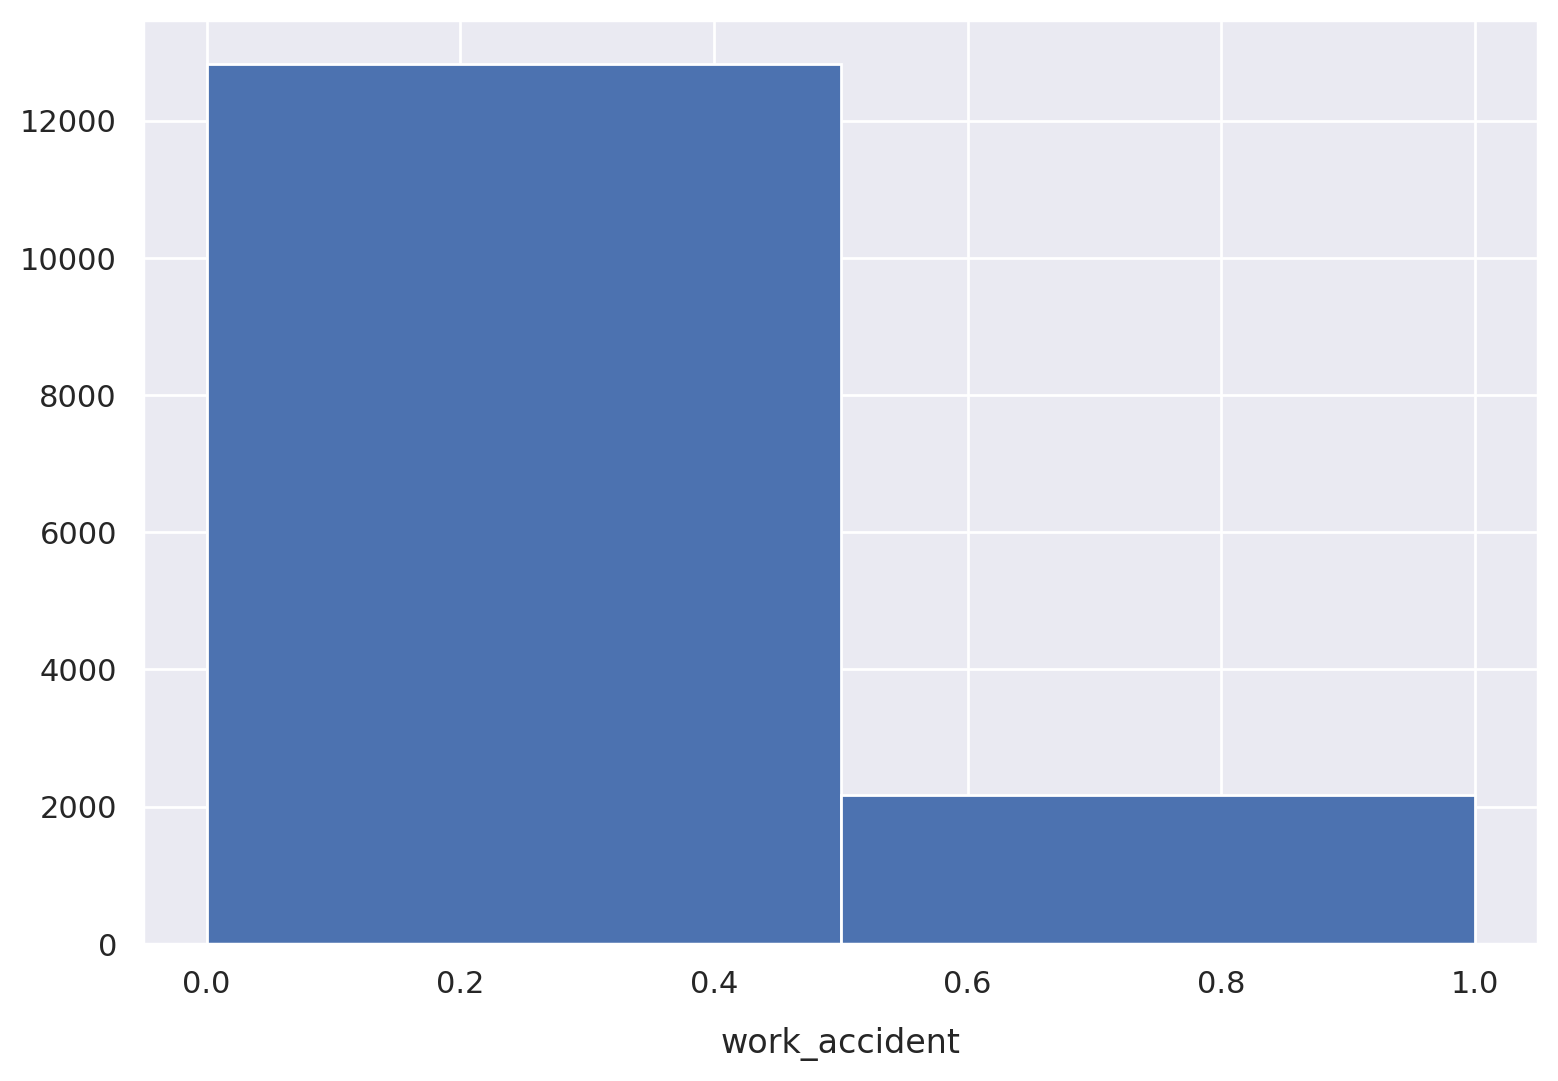

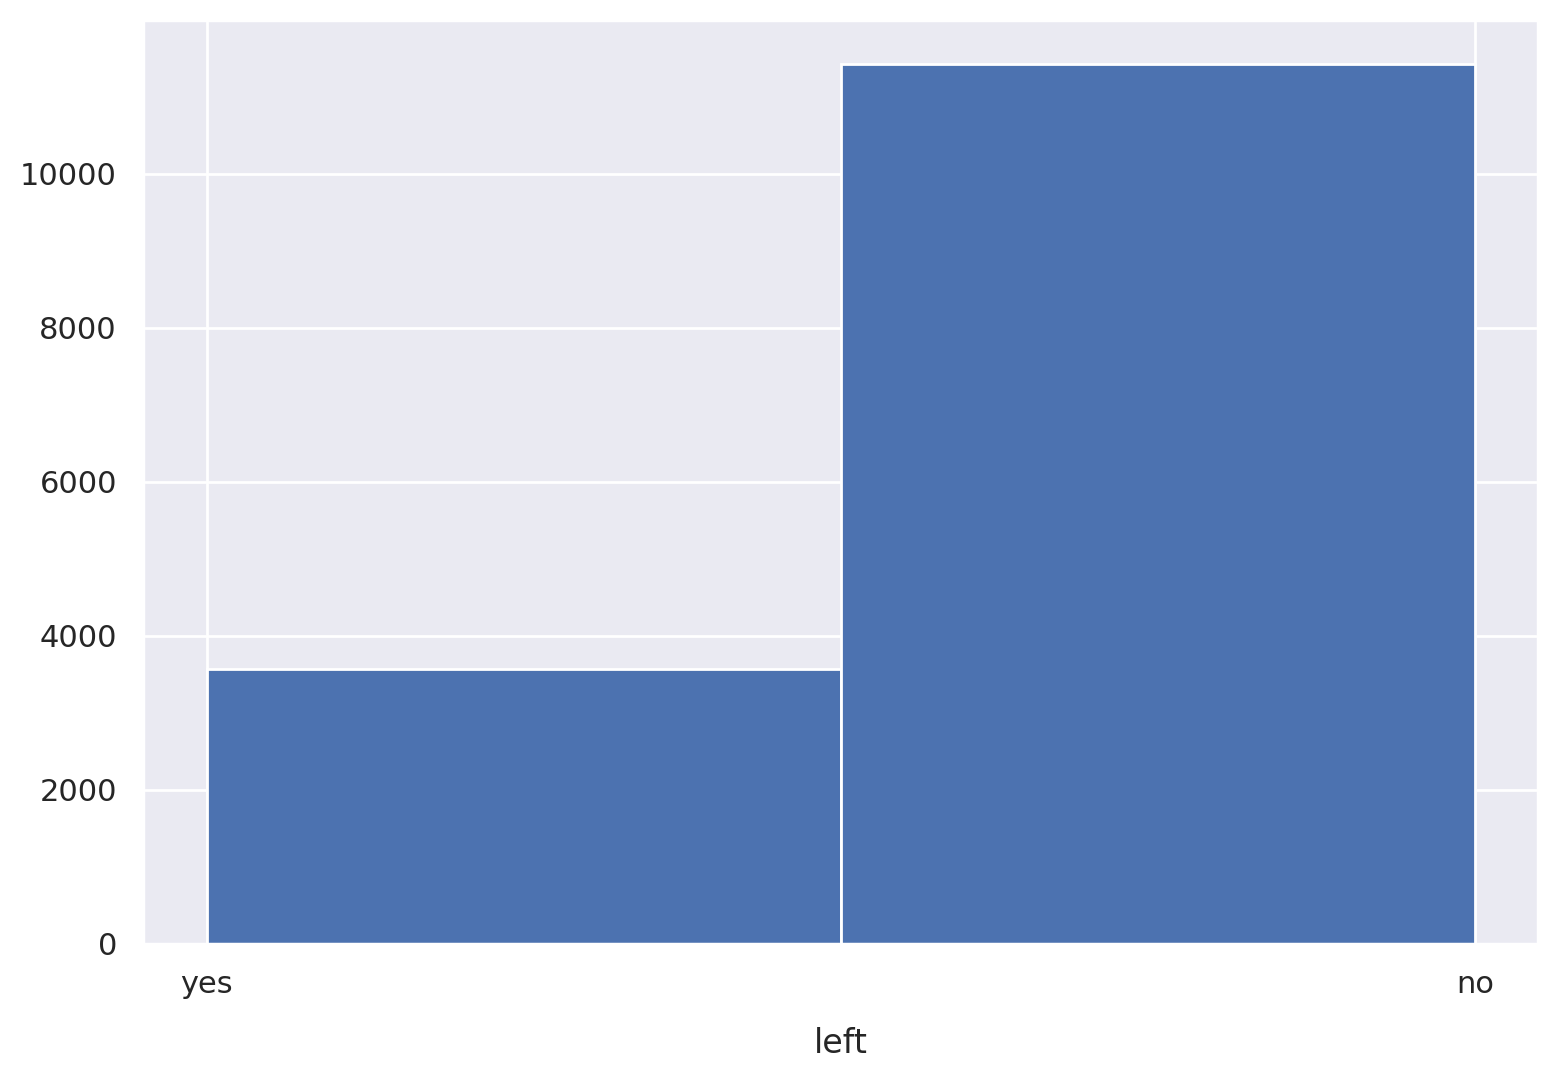

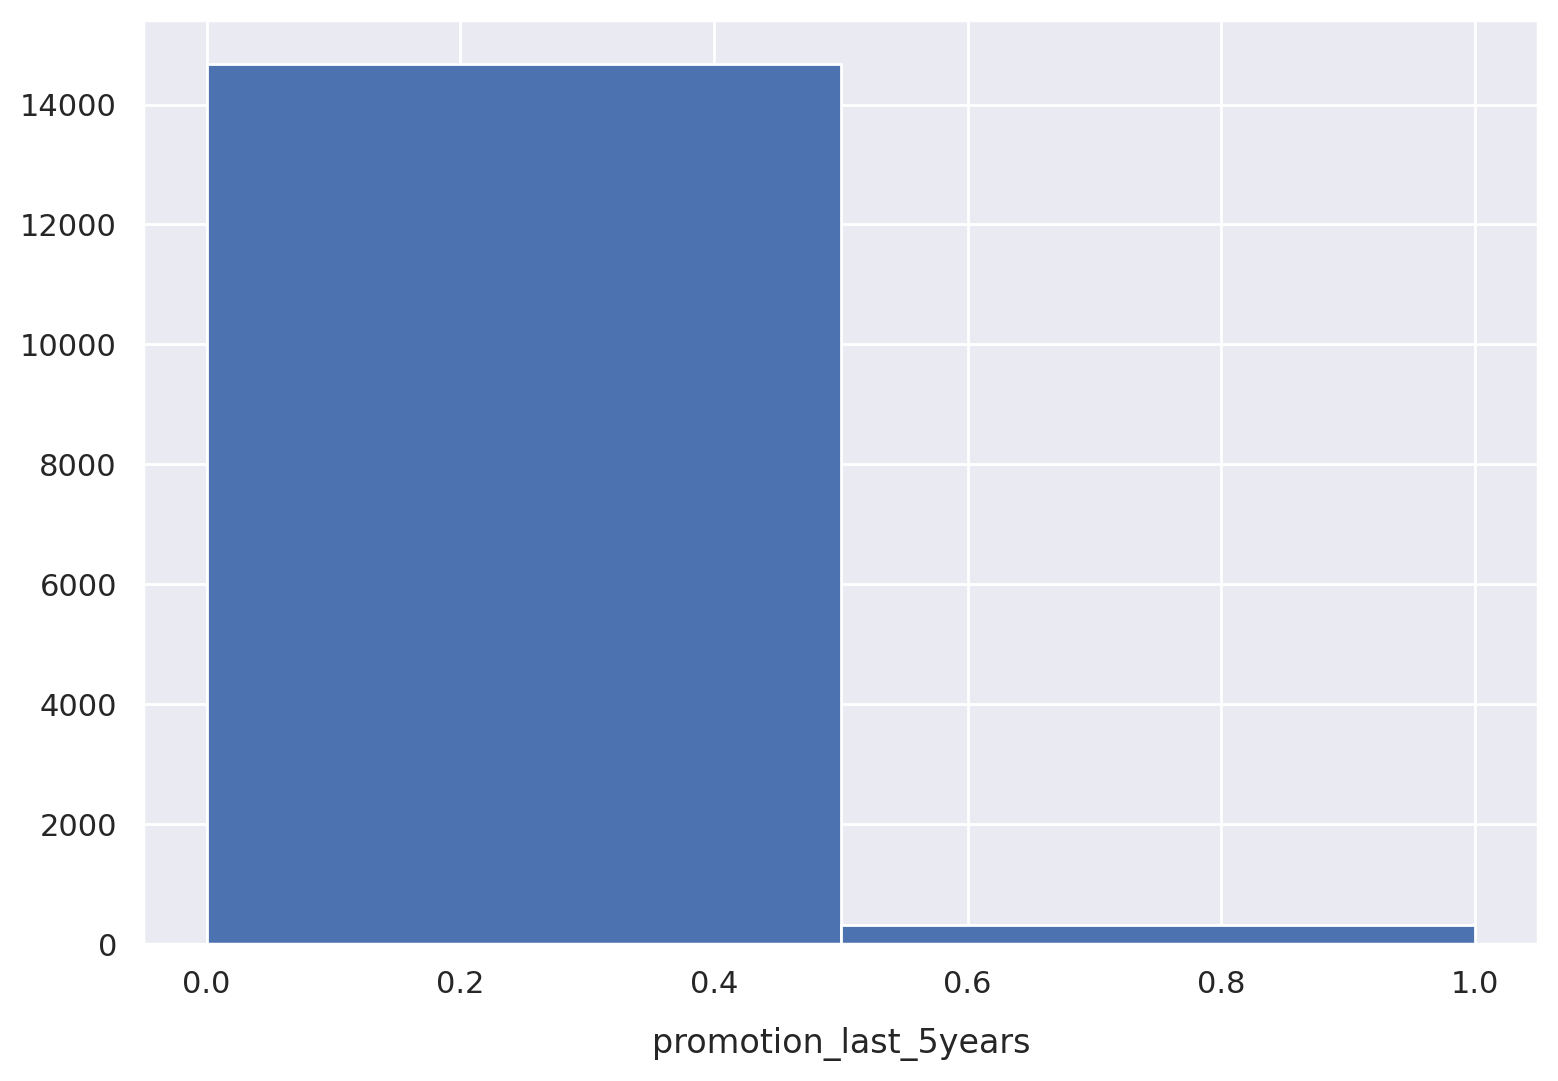

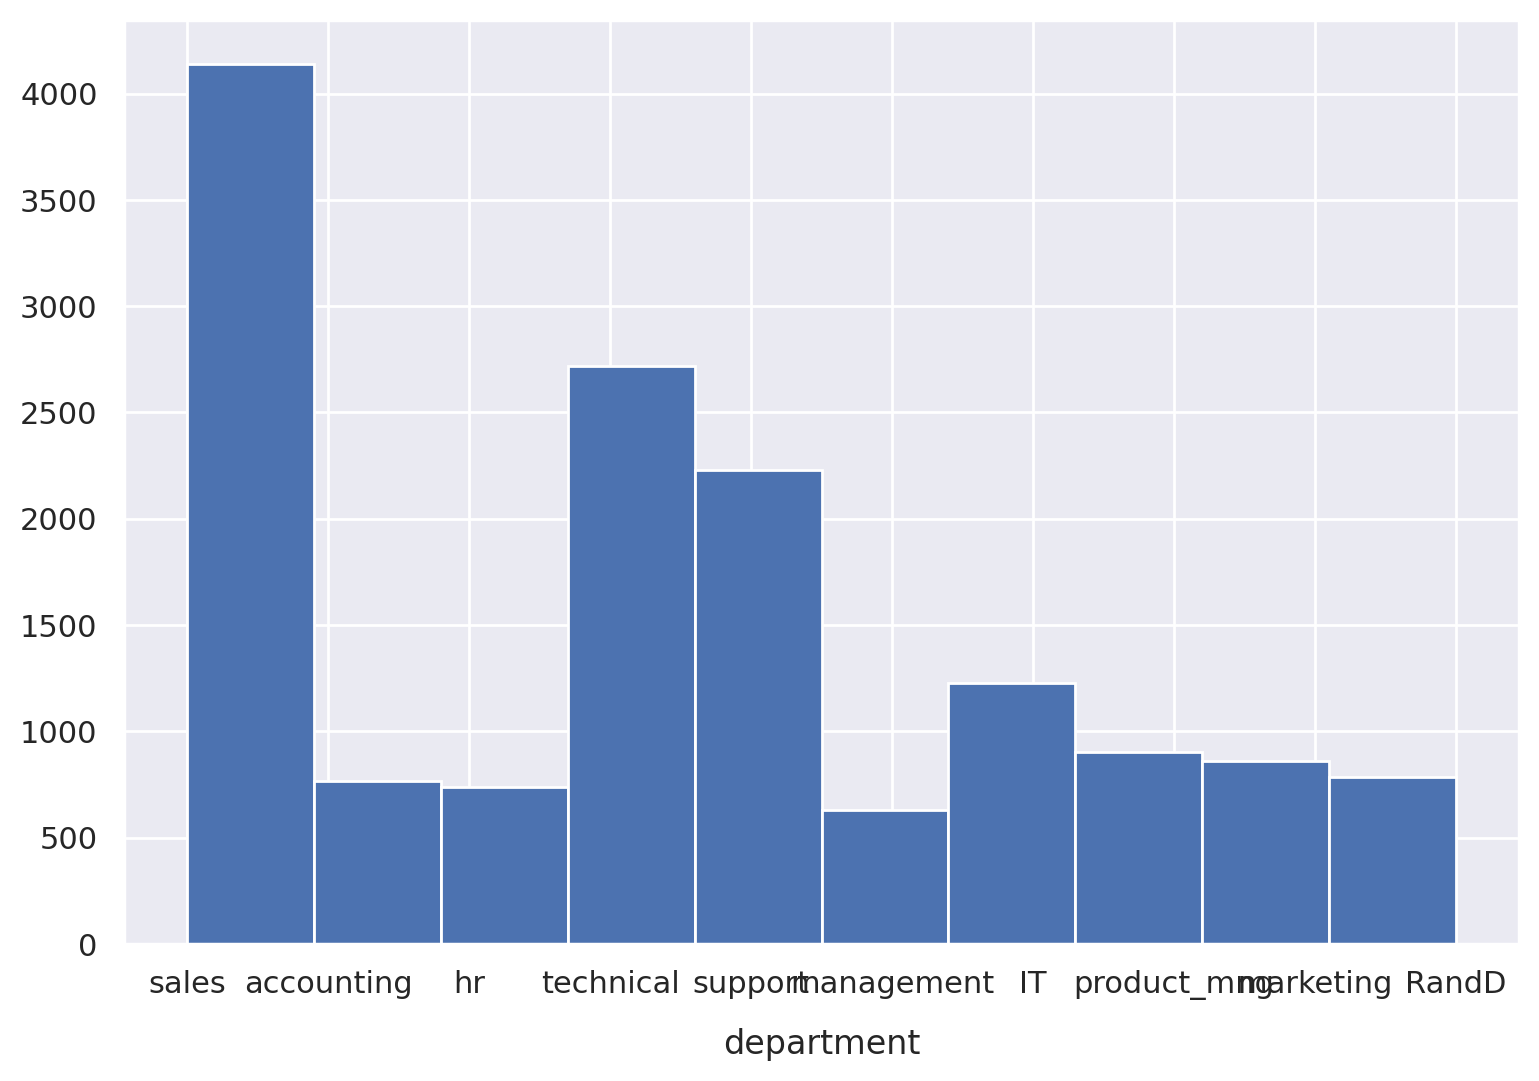

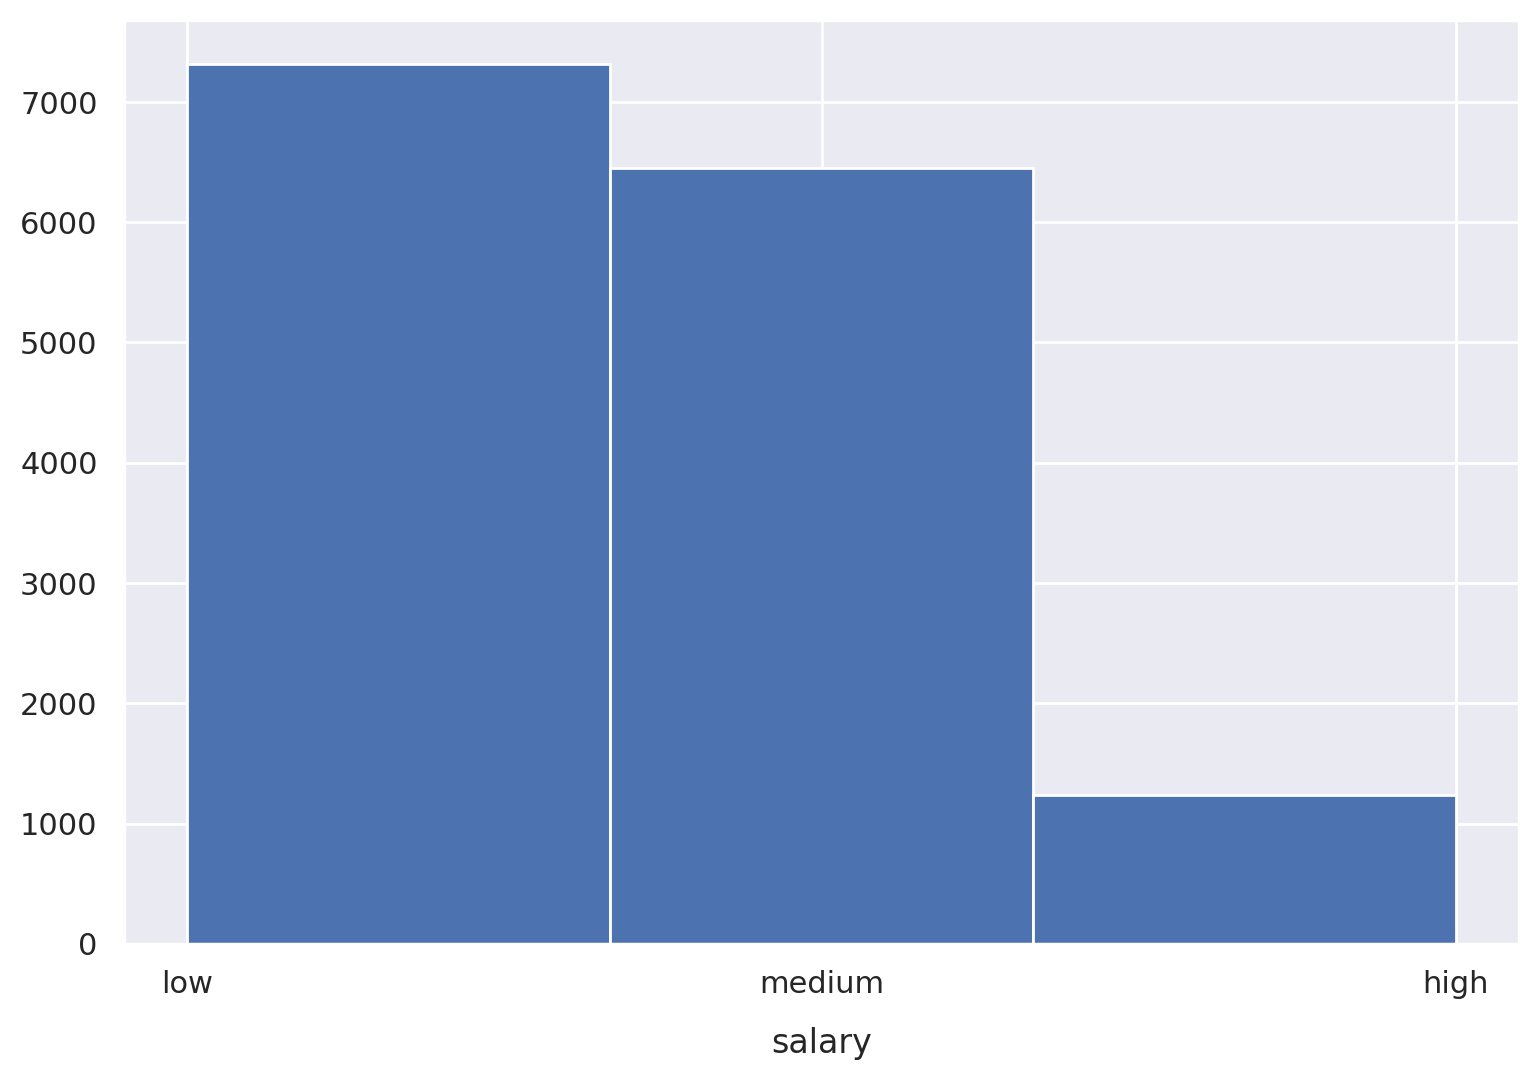

In [24]:
# Print the distibutions
for f in df.columns:
    try:
        fig = plt.figure()
        num_bins = min((30, len(df[f].unique())))
        df[f].hist(bins=num_bins)
        plt.xlabel(f)
    except TypeError:
        print()
        print(df[f].value_counts())
        print('-'*30)
        plt.close()

3- Check how many NaN values are in each column:

a. How many NaNs as total ( 1 point)

b. How many NaNs as a percentage of overall data

In [12]:
# a. How many NaNs as total
# write your code here:
import pandas as pd

# Assume df is your DataFrame
total_nan = df.isna().sum().sum()
print(f"Total NaNs: {total_nan}")

# Total number of elements in the DataFrame
total_elements = df.size

# Calculate the percentage of NaNs
nan_percentage = (total_nan / total_elements) * 100
print(f"Percentage of NaNs: {nan_percentage:.2f}%")

Total NaNs: 15283
Percentage of NaNs: 9.26%


In [13]:
# b. How many NaNs as a percentage of overall data
df.isnull().sum() / len(df) * 100

,0
satisfaction_level,0.000000
last_evaluation,0.000000
number_project,0.000000
average_montly_hours,2.453497
time_spend_company,1.006734
work_accident,0.000000
left,0.000000
promotion_last_5years,0.000000
is_smoker,98.433229
department,0.000000


We can see there are about 2.5% missing for average_montly_hours, 1% missing for time_spend_company, and 98% missing for is_smoker! Let's use a couple of different strategies that you've learned to handle these.

4- Drop the is_smoker column as there is barely any information in this metric using del (1 point)

In [25]:
# Remove is_smoker
import pandas as pd

# Assume df is your DataFrame
del df['is_smoker']

KeyError: 'is_smoker'

5- Fill the NaN values in the time_spend_company column with median (2 points)

In [16]:
# Fill time_spend_company
df['time_spend_company'].fillna(df['time_spend_company'].median(), inplace=True)

6-Make a boxplot of average_montly_hours segmented (your y axis) by number_project (your x axis):
use sns.boxplot( )

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

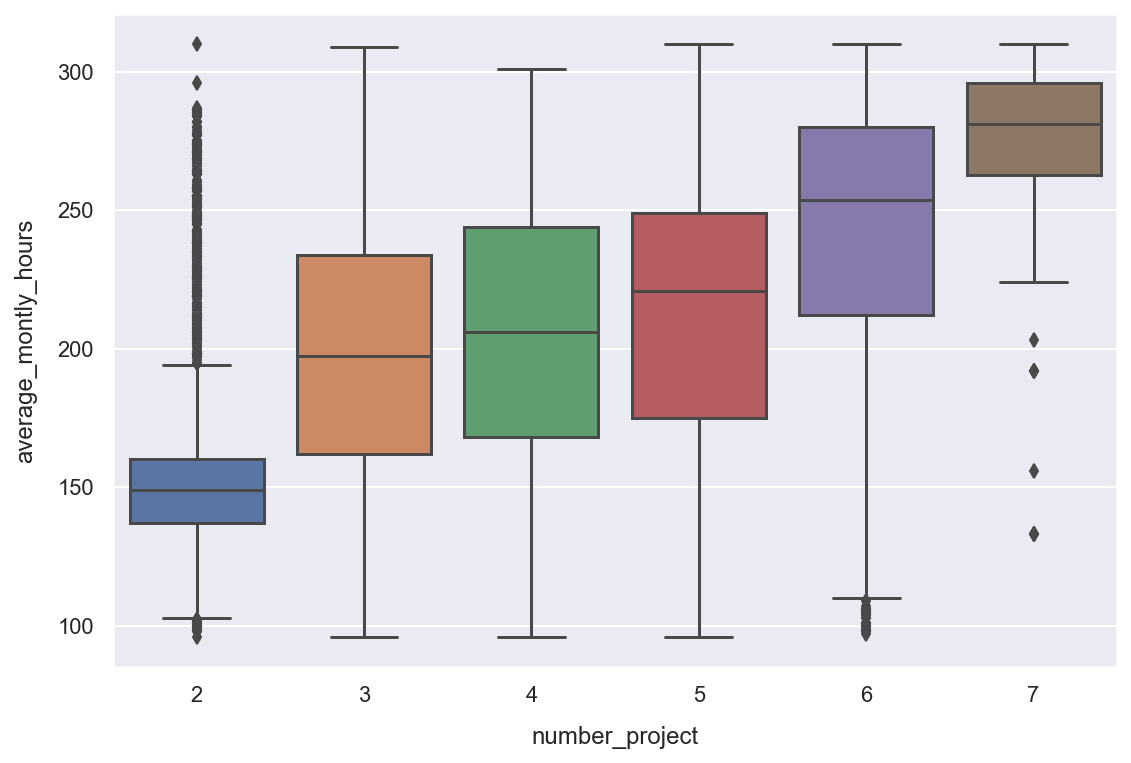

In [ ]:
# How does average_montly_hours depend on number_project

sns.boxplot(x='number_project', y='average_montly_hours', data=df)

7- save the figure using plt.savefig(1 point)

In [20]:
# write your code here:
plt.savefig('boxplot_average_montly_hours_vs_number_project.png')
plt.show()

<Figure size 900x600 with 0 Axes>

8- Calculate the mean of each group by running the following code:

In [22]:
# Calculate fill values for average_montly_hours

mean_per_project = df.groupby('number_project')\
                    .average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

We can then map this onto the number_project column and pass the resulting series object as the argument to fillna.

9- Fill the NaN values in average_montly_hours by the following value: (1 point)

In [23]:
fill_values = df.number_project.map(mean_per_project)
# Fill average_monthly_hours with the fill_values
# write your code here
df['average_montly_hours'] = df['average_montly_hours'].fillna(fill_values)

10- Confirm that df has no more NaN values. If all columns have True, then you have successfully removed the NaNs from the table ( 1 point)

In [26]:
# Make sure we are all clear of NaNs
no_nans = df.notna().all().all()
print(f"All columns have no NaNs: {no_nans}")

All columns have no NaNs: True


11- Transform the string and Boolean fields into integer representations. (2 points)

In particular, we'll manually convert the target variable left from yes and no to 1 and 0 and build the one-hot encoded features.

In [27]:

# 1. Convert the target variable 'left' from 'yes'/'no' to 1/0
df['left'] = df['left'].map({'yes': 1, 'no': 0})

# 2. One-hot encode categorical features
#'department' and 'salary' are categorical features
df = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

# Verify the changes
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2            157.000000   
1                0.80             0.86               5            262.000000   
2                0.11             0.88               7            272.000000   
3                0.72             0.87               5            223.000000   
4                0.37             0.52               2            160.163535   

   time_spend_company  work_accident  left  promotion_last_5years  \
0                 3.0              0     1                      0   
1                 6.0              0     1                      0   
2                 4.0              0     1                      0   
3                 5.0              0     1                      0   
4                 3.0              0     1                      0   

   department_RandD  department_accounting  department_hr  \
0             False                  False 

12- Print df.columns to show the fields (1 point)



In [29]:
# write your code here#
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')


13- We have completed the data preprocessing! Let's save our preprocessed data by running the following code:

In [30]:
# Save to file

df.to_csv('hr_data_processed.csv', index=False)